<a href="https://colab.research.google.com/github/adlerviton/Mini_project_9/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages, Read and Clean Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [6]:
SPX = pd.read_csv("SPX.csv")
SPX['Date'] = pd.to_datetime(SPX['Date'])
SPX['Change'] = SPX['Close'] - SPX['Open']
SPX['Increased'] = (SPX['Close'] > SPX['Open']).astype(int)
SPX['Change_mag'] = np.abs(SPX['Close'] - SPX['Open'])

In [ ]:
for col in SPX.columns[:-1]:  # Exclude the last column (outcome)
    SPX[col + '_lag'] = SPX[col].shift(-1)
SPX = SPX.iloc[:-1]

# Exploratory Data Analysis

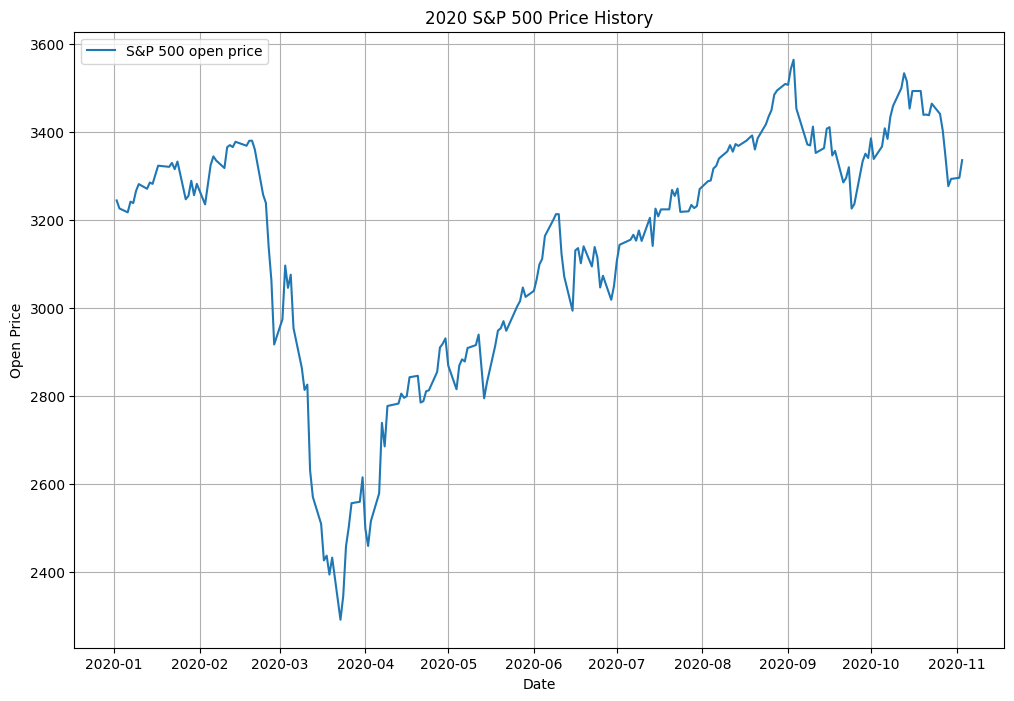

In [7]:

Pastyr = SPX[SPX['Date'] > pd.to_datetime('2019-12-31')]
x = Pastyr['Date']
y = Pastyr['Open']

plt.figure(figsize = (12, 8))
plt.plot(x,y,'-',label='S&P 500 open price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('2020 S&P 500 Price History')
plt.grid()
plt.legend(loc='upper left')
plt.show()

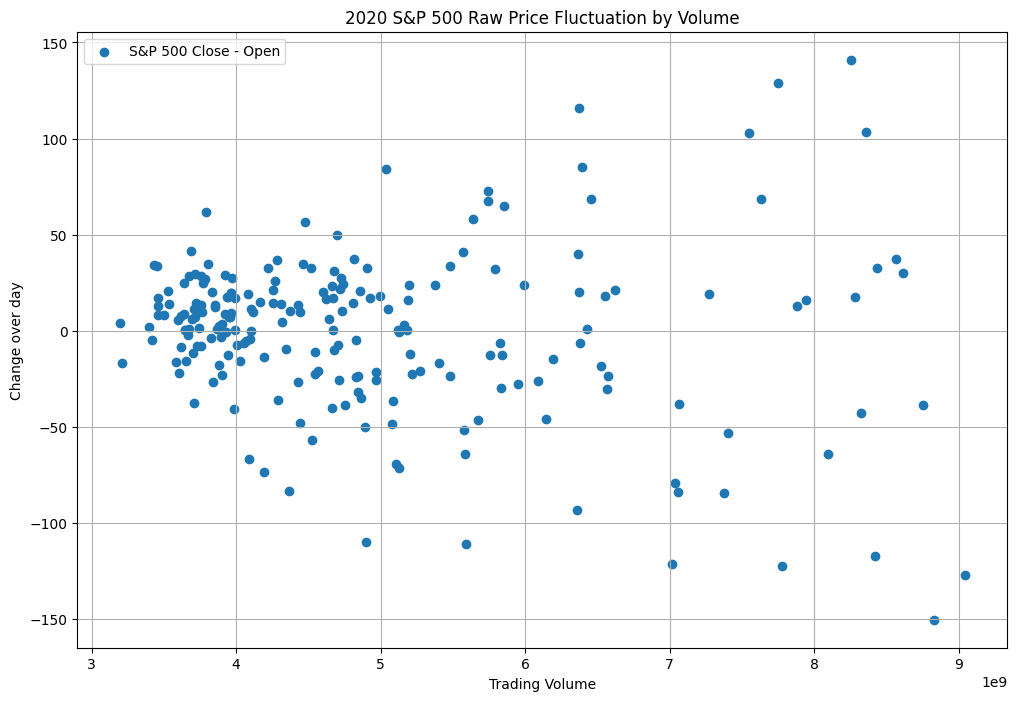

In [8]:
x = Pastyr['Volume']
y = Pastyr['Change']
plt.figure(figsize = (12, 8))
plt.scatter(x,y,label='S&P 500 Close - Open')
plt.xlabel('Trading Volume')
plt.ylabel('Change over day')
plt.title('2020 S&P 500 Raw Price Fluctuation by Volume')
plt.grid()
plt.legend(loc='upper left')
plt.show()



# Models and Results

<ipython-input-70-7b899a0ed1b0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thisyr['predicted_change'] = model.predict(preds)


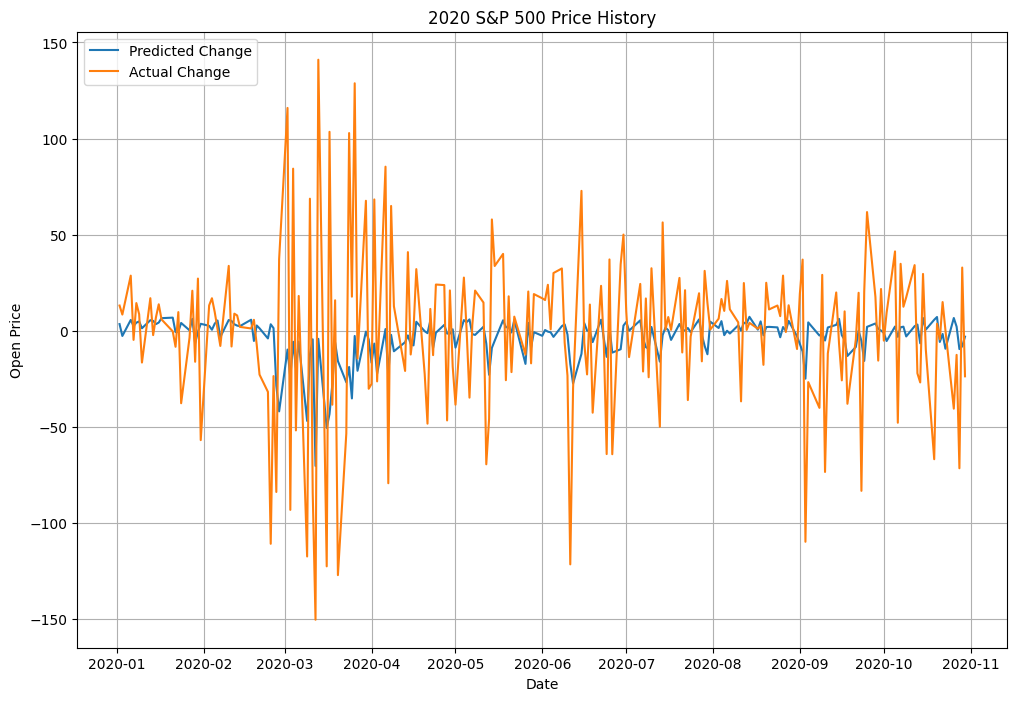

In [70]:
outcome = SPX['Change']
lag_cols = SPX.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

model_full = LinearRegression()
model_full.fit(lag_cols, outcome)

preds = Pastyr.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

Pastyr['predicted_change'] = model_full.predict(preds)


y1 = Pastyr['predicted_change']
y2 = Pastyr['Change']
x = Pastyr['Date']

plt.figure(figsize = (12, 8))
plt.plot(x,y1,'-',label='Predicted Change')
plt.plot(x,y2,'-',label='Actual Change')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('2020 S&P 500 Price History')
plt.grid()
plt.legend(loc='upper left')
plt.show()

<ipython-input-19-d3c78ddd5953>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pastyr['predicted_change'] = model_10yr.predict(preds)


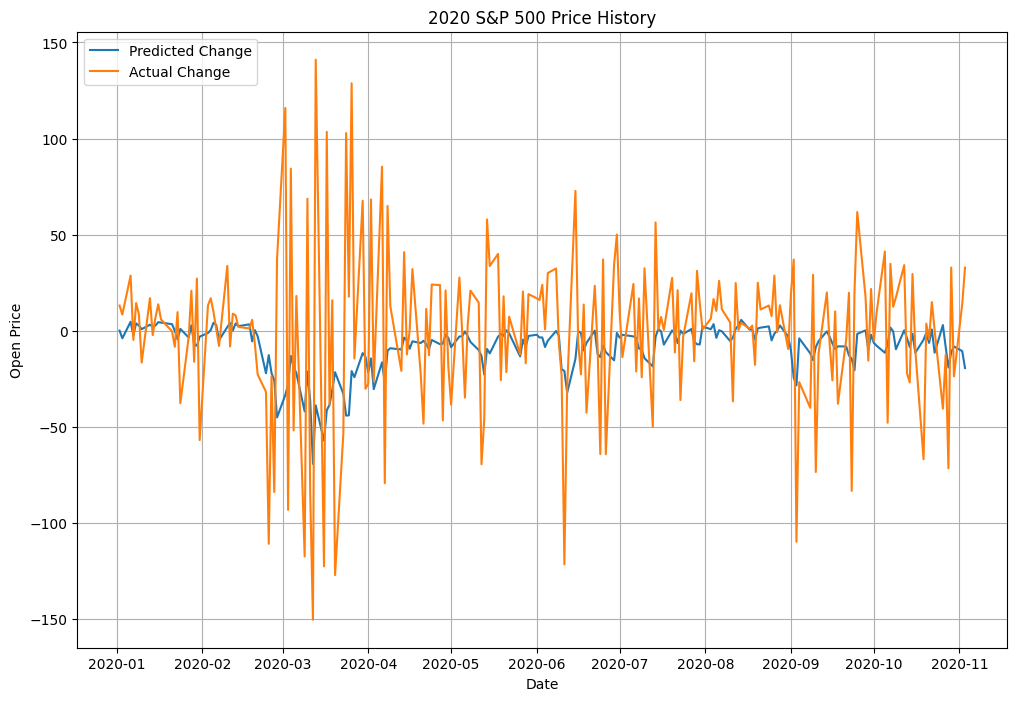

In [19]:
SPX10 = SPX[SPX['Date'] > pd.to_datetime('2009-12-31')]
SPX10 = SPX10[SPX10['Date'] < pd.to_datetime('2019-12-31')]
outcome10 = SPX10['Change']
lag_cols10 = SPX10.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

model_10yr = LinearRegression()
model_10yr.fit(lag_cols10, outcome10)

preds = Pastyr.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

Pastyr['predicted_change'] = model_10yr.predict(preds)


y1 = Pastyr['predicted_change']
y2 = Pastyr['Change']
x = Pastyr['Date']

plt.figure(figsize = (12, 8))
plt.plot(x,y1,'-',label='Predicted Change')
plt.plot(x,y2,'-',label='Actual Change')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('2020 S&P 500 Price History')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [30]:
SPX10 = SPX[SPX['Date'] > pd.to_datetime('2009-12-31')]
SPX10 = SPX10[SPX10['Date'] < pd.to_datetime('2019-12-31')]
outcome10 = SPX10['Increased']
lag_cols10 = SPX10.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

model_10yr = LogisticRegression()
model_10yr.fit(lag_cols10, outcome10)

preds = Pastyr.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]
y = Pastyr['Increased']

print(model_10yr.score(preds,y))

print(model_10yr.predict(preds))

0.5727699530516432
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<ipython-input-29-75044fc9abd7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pastyr['predicted_change_mag'] = model_10yr.predict(preds)
<ipython-input-29-75044fc9abd7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pastyr['predicted_change_full'] = model_full.predict(preds).astype(int)
<ipython-input-29-75044fc9abd7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

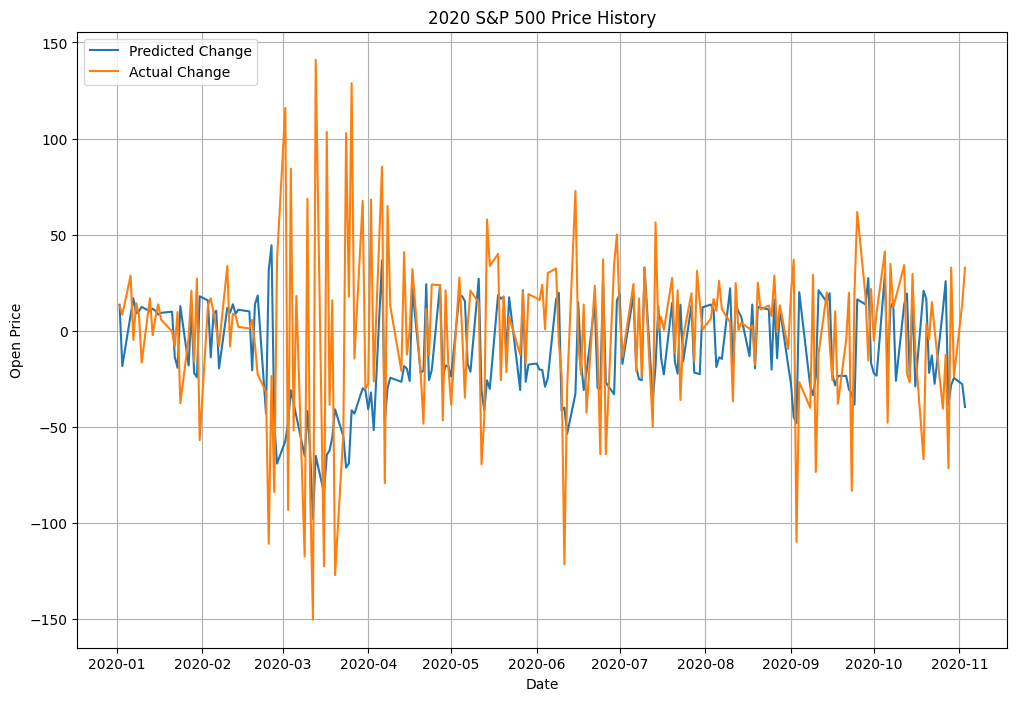

In [29]:
outcome = SPX['Change']
lag_cols = SPX.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

model_full = LinearRegression()
model_full.fit(lag_cols, outcome)

SPX10 = SPX[SPX['Date'] > pd.to_datetime('2009-12-31')]
SPX10 = SPX10[SPX10['Date'] < pd.to_datetime('2019-12-31')]
outcome10 = SPX10['Change_mag']
lag_cols10 = SPX10.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

model_10yr = LinearRegression()
model_10yr.fit(lag_cols10, outcome10)

outcome10 = SPX10['Increased']
lag_cols10 = SPX10.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

#logmodel_10yr = LogisticRegression()
#logmodel_10yr.fit(lag_cols10, outcome10)


#preds = Pastyr.loc[:, [ 'Open_lag',	'High_lag',	'Low_lag',	'Close_lag',	'Adj Close_lag',	'Volume_lag']]

#print(np.c(logmodel_10yr.predict(lag_cols10)))

Pastyr['predicted_change_mag'] = model_10yr.predict(preds)
Pastyr['predicted_change_full'] = model_full.predict(preds).astype(int)
Pastyr['predicted_change_sign'] = (Pastyr['predicted_change_full'] > 0).astype(int)
Pastyr['predicted_change'] = -1*Pastyr['predicted_change_mag'] + 2*Pastyr['predicted_change_sign']*Pastyr['predicted_change_mag']



y1 = Pastyr['predicted_change']
y2 = Pastyr['Change']
x = Pastyr['Date']

plt.figure(figsize = (12, 8))
plt.plot(x,y1,'-',label='Predicted Change')
plt.plot(x,y2,'-',label='Actual Change')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('2020 S&P 500 Price History')
plt.grid()
plt.legend(loc='upper left')
plt.show()